<a href="https://colab.research.google.com/github/temple17/kagglepractice/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
# !pip install matplotlib --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/Netflix Movies and TV Shows/dataset/netflix_titles.csv')

# Quick overview

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- There are some missing data in 'director', 'cast', 'country', 'date_added', 'rating', 'duration'

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Interesting Task Ideas suggested in kaggle
- Understanding what content is available in different countries
- Identifying similar content by matching text-based features
- Network analysis of Actors / Directors and find interesting insights
- Does Netflix has more focus on TV Shows than movies in recent years.

# Exploratory Data Analysis Steps

## 1. Setting the goals about the dataset(keep updating)
- top 10 countries on Netflix
- global genre preference
- release_year and duration


## 2. Precise EDA
### 2.1 univariate analysis
### 2.2 bi-variate analysis
### 2.3 missing value treatment
### 2.4 outlier treatment
#### 2.4.1 detect outlier
#### 2.4.2 remove outlier

## 3. Feature engineering
### 3.1 variable transformation
### 3.2 variable / feature selection
### 3.3 variable creation



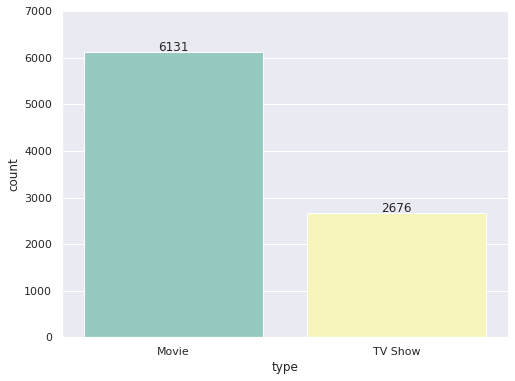

In [7]:
plt.figure(figsize=(8,6))
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'type', palette='Set3', data = df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 15, height, ha = 'center', size = 12)

ax.set_ylim(0, 7000)
plt.show()

According to the above countplot, there are 6131 movies and 2676 TV shows.   
It means Movie count is 2.3 times as many as TV show's.

# Most content creating countries

In [8]:
netflix_movies = df[df['type'] == "Movie"]
netflix_shows = df[df['type'] == "TV Show"]

In [9]:
countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
cou = list(netflix_movies['country'])
# print(cou)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
for i in cou:
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1


In [11]:
# print(countries)

In [12]:
countries_fin = {}
for country, no in countries.items():
    country = country.replace(' ', '')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country]= no

countries_fin = {k: v for k, v in sorted(countries_fin.items(), key = lambda item: item[1], reverse=True)}

In [13]:
# print(countries_fin)

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

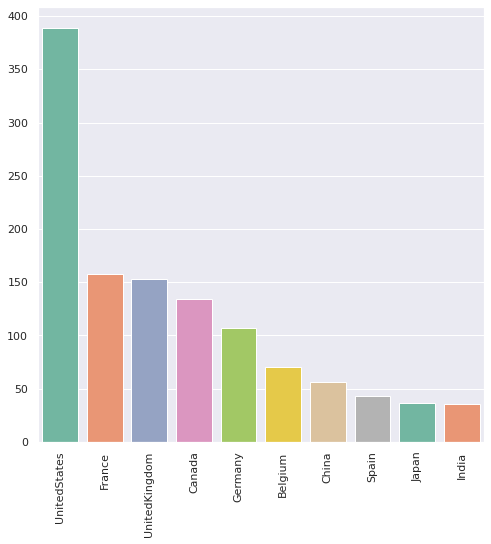

In [14]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10], palette='Set2')
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation = 90)

# Netflix through the years

Text(2.4, 1.57, 'From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?')

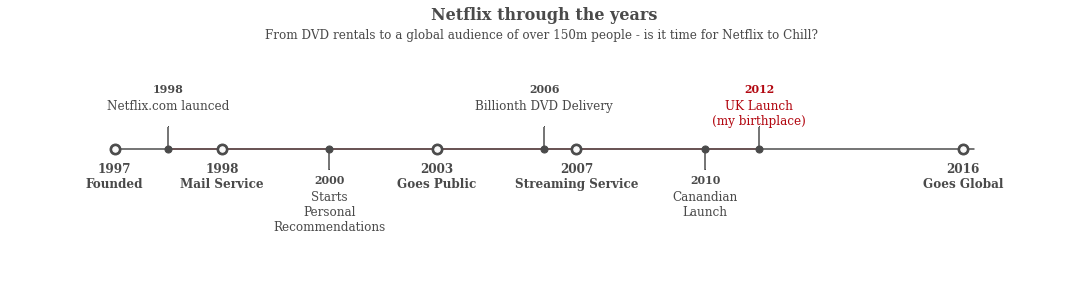

In [17]:
# Timeline code from Subin An's awesome notebook
# https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

from datetime import datetime

tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming Service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8.9]

tl_sub_x = [1.5, 3, 5, 6.5, 7]

tl_sub_times = [
    "1998", "2000", "2006", "2010", "2012"
]

tl_text = [
    "Netflix.com launced",
    "Starts\nPersonal\nRecommendations", "Billionth DVD Delivery", "Canandian\nLaunch", "UK Launch\n(my birthplace)"]

fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a',zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)

ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a', zorder=4)

for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3

markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2) -0.6, txt, va='top', ha='center',
            fontfamily='serif', color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')
    
for spine in ['left', 'top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('none')

ax.set_title('Netflix through the years', fontweight='bold', fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4, 1.57, "From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', 
        fontsize=12, color='#4a4a4a')

# Top 10 countries on Netflix

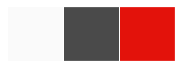

In [16]:
sns.palplot(['#fafafa', '#4a4a4a', '#e3120b'])

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#e3120b'

# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# ax.bar(df.index, df, width=0.5, edgecolor='darkgrey', linewidth=0.6, color=color_map)